# OH - 11 - EDA

Objectives of EDA:

- Discover patterns
- Spot anomalies
- Frame hypothesis
- Check assumptions

Common methods:

- Univariate analysis
- Multivariate analysis

In [16]:
# import libraries and data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Load the data
df = pd.read_csv("houses.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
# How many numerical columns
df.select_dtypes(include=np.number).shape[1]

38

In [8]:
# How many categorical columns
df.select_dtypes(include=object).shape[1]

43

In [9]:
sale_price = df["SalePrice"]

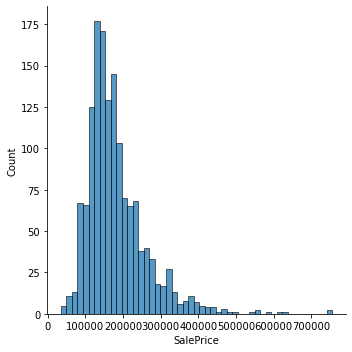

In [11]:
sns.displot(sale_price, kde=False)

<AxesSubplot:xlabel='SalePrice'>

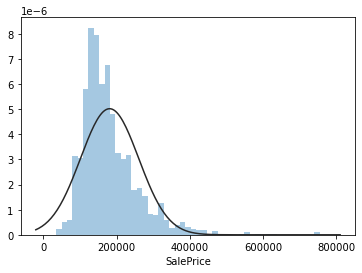

In [17]:
sns.distplot(sale_price, kde=False, fit=stats.norm)

<AxesSubplot:xlabel='SalePrice'>

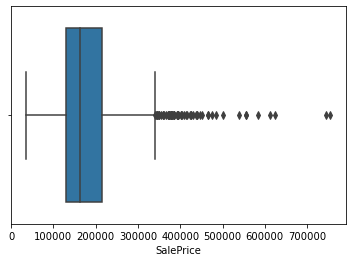

In [18]:
sns.boxplot(sale_price)

In [19]:
num_var = df.select_dtypes(include=np.number)

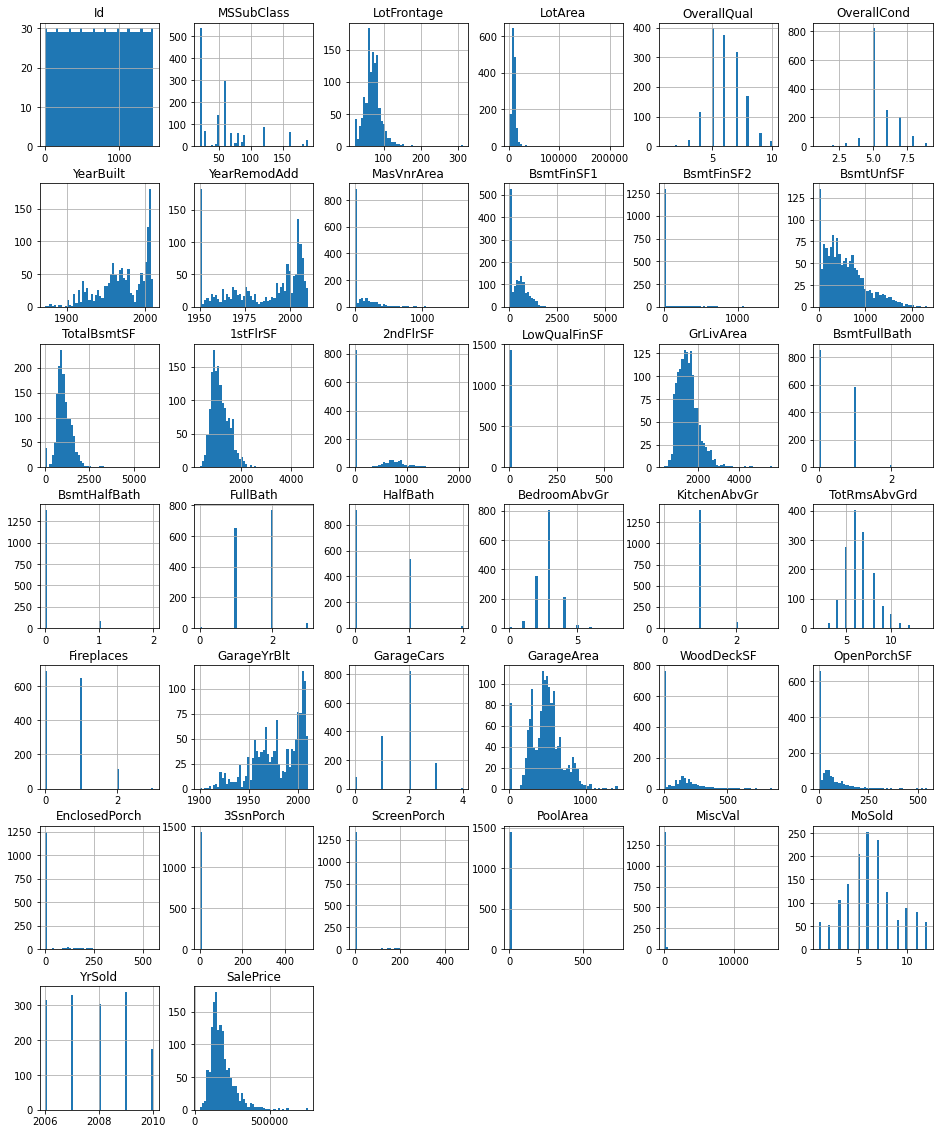

In [20]:
num_var.hist(figsize=(16,20), bins=50)
plt.show()

ValueError: No variables found for grid columns.

<Figure size 1152x1440 with 0 Axes>

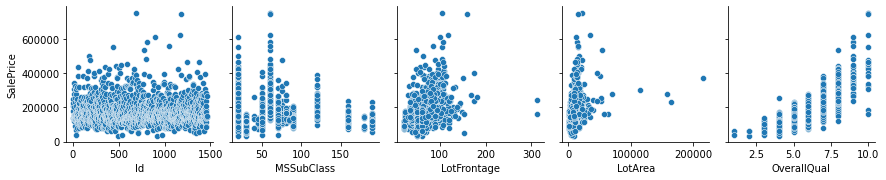

<Figure size 1152x1440 with 0 Axes>

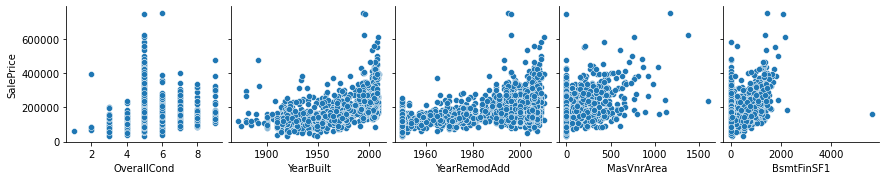

<Figure size 1152x1440 with 0 Axes>

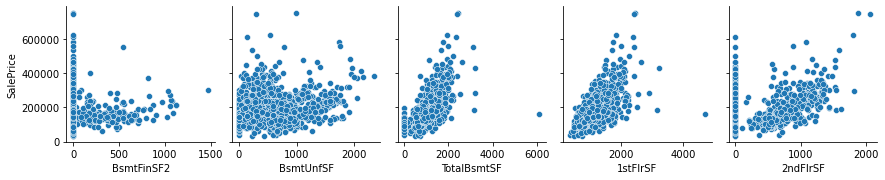

<Figure size 1152x1440 with 0 Axes>

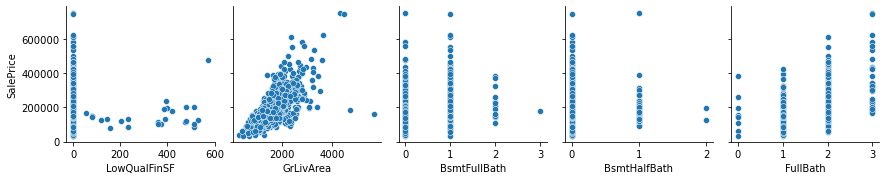

<Figure size 1152x1440 with 0 Axes>

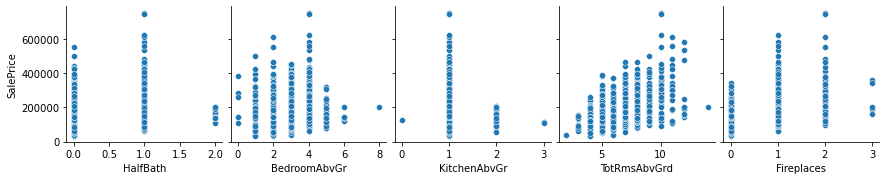

<Figure size 1152x1440 with 0 Axes>

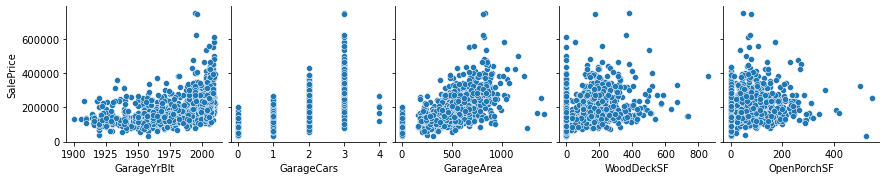

<Figure size 1152x1440 with 0 Axes>

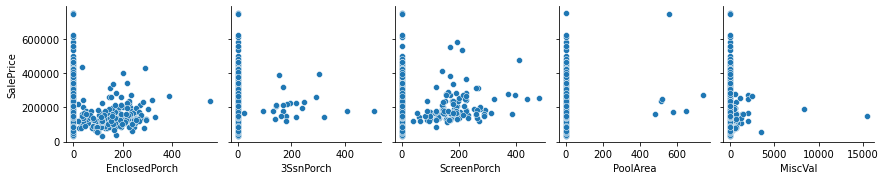

<Figure size 1152x1440 with 0 Axes>

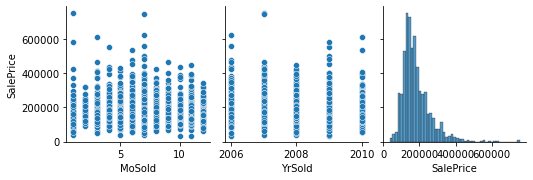

<Figure size 1152x1440 with 0 Axes>

In [21]:
# Check the relationship with saleprice

for i in range(0, len(num_var),5):
    plt.figure(figsize=(16,20))
    sns.pairplot(data=num_var,
                x_vars=num_var.columns[i:i+5],
                y_vars="SalePrice")  

In [22]:
# Correlation

corr = df.corr()

<AxesSubplot:>

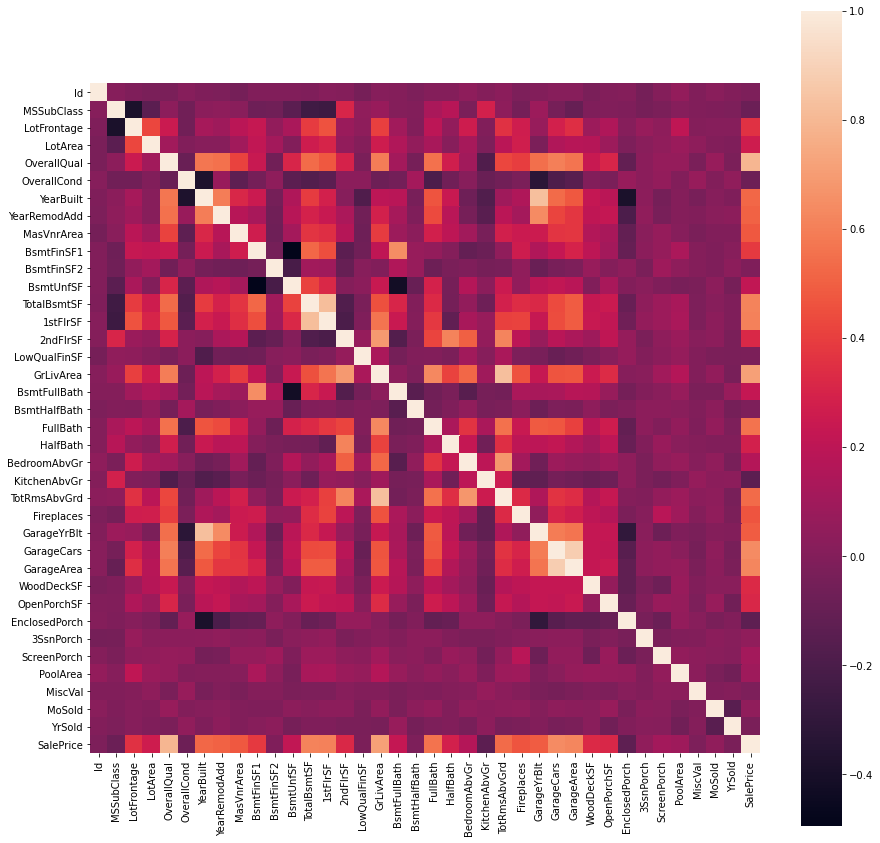

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,square=True)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


<AxesSubplot:>

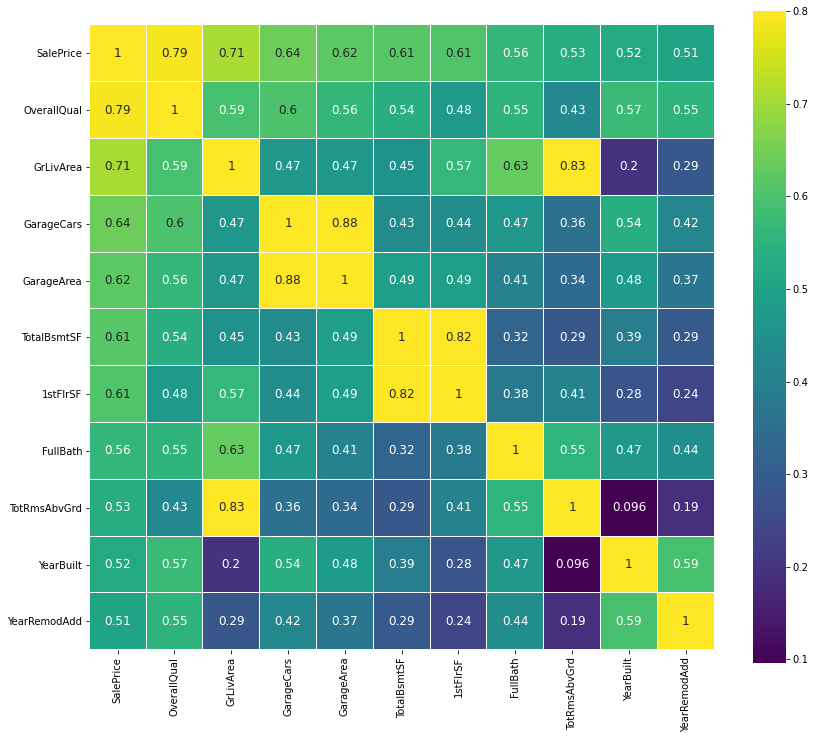

In [26]:
k= 11
cols = corr.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

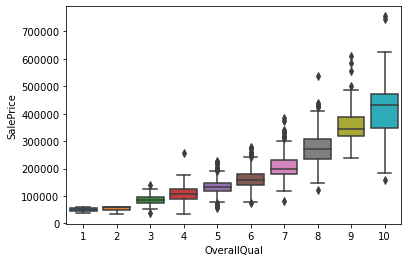

In [27]:
sns.boxplot(x="OverallQual", y="SalePrice", data=df)

In [28]:
df["Neighborhood"]

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1455    Gilbert
1456     NWAmes
1457    Crawfor
1458      NAmes
1459    Edwards
Name: Neighborhood, Length: 1460, dtype: object

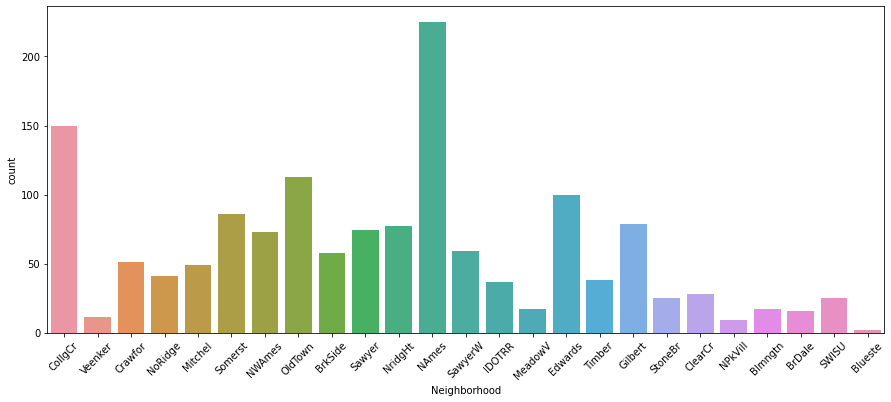

In [30]:
plt.figure(figsize=(15,6))
sns.countplot(x="Neighborhood", data=df)
plt.xticks(rotation=45)
plt.show()

In [31]:
# Missing values

total = num_var.isnull().sum().sort_values(ascending=False)
percent = (num_var.isnull().sum() / num_var.isnull().count()).sort_values(ascending=False)
missing_df = pd.concat([total,percent], axis=1, 
                      join="outer",
                       keys=["Total Missing", "% of missing"])

In [32]:
missing_df

,Total Missing,% of missing
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
Id,0,0.000000
OpenPorchSF,0,0.000000
KitchenAbvGr,0,0.000000
TotRmsAbvGrd,0,0.000000
Fireplaces,0,0.000000
GarageCars,0,0.000000
GarageArea,0,0.000000
